In [1]:
import bisect
import sys
from test_functions import test_functions
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
rec = 100000
sys.setrecursionlimit(rec)

In [11]:
def func_1(x, n):
    return sum(100 * ((x[0] - x[1]) ** 2) + 5 * (1 - x[j]) ** 2 for j in range(1, n))

def func_1_grad(x, n):
    result = x * 10 - 10
    result[0], result[1] = 200 * x[0] - 200 * x[1], -200 * x[0] + 210 * x[1] - 10
    return np.array(result)

def func_2(x_1, x_2):
    return 100 * (x_2 - x_1 ** 2) ** 2 + 5 * (1 - x_1) ** 2

def func_2_grad(x_1, x_2):
    return (10 * (40 * x_1 ** 3 - 40 * x_1 * x_2 + x_1 - 1), 200 * (x_2 - x_1 ** 2))

In [25]:
def golden_1(f, b, a, c1, c2, epsilon = 10 ** (-12)):

    phi = (1 + (5 ** 1 / 2)) / 2
    c, d = b - (b - a) / phi, a + (b - a) / phi
    while abs(b - a) > epsilon:
        if f(c, c1, c2) < f(d, c1, c2):
            b = d
        else:
            a = c

        c = b - (b - a) / phi
        d = a + (b - a) / phi

    return (a + b) / 2

In [26]:
def golden_2(f, b, a, c1, c2, c3, c4, epsilon = 10 ** (-12)):
    phi = (1 + (5 ** 1 / 2)) / 2
    c, d = b - (b - a) / phi, a + (b - a) / phi
    while abs(b - a) > epsilon:
        if f(c, c1, c2, c3, c4) < f(d, c1, c2, c3, c4):
            b = d
        else:
            a = c

        c = b - (b - a) / phi
        d = a + (b - a) / phi

    return (a + b) / 2

In [27]:
def grad_1(f, fgrad, x, case, counter):

    n = len(x)
    start = f(x, n)
    counter += 1
    fdot = fgrad(x, n)
    c1, c2 = x, fdot
    def f_one(h, c1, c2):
        return f(c1 - h * c2, n)

    if case == 1:
        b, a = 100000, 0
        h = golden_1(f_one, b, a, c1, c2)

    elif case == 2:
        h = 0.001

    else:
        alpha = 0.01
        h = 1
        q = 0.8
        while f(x - h * fdot, n) > f(x, n) - alpha * h * np.linalg.norm(fdot):
            h = q * h


    finish = f(x - h * fdot, n)
    if abs(start - finish) < 10 ** (-6):
        return x, finish, counter

    return grad_1(f, fgrad, x - h * fdot, case, counter)

In [32]:
def grad_2(f, fgrad, x_1, x_2, x_s, y_s, case, counter):

    start = f(x_1, x_2)
    counter += 1
    fdot1, fdot2 = fgrad(x_1, x_2)
    c1, c2, c3, c4 = x_1, fdot1, x_2, fdot2

    def f_one(h, c1, c2, c3, c4):
        return f(c1 - h * c2, c3 - h * c4)

    if case == 1:
        b, a = 100000, 0
        h = golden_2(f_one, b, a, c1, c2, c3, c4)

    elif case == 2:
        h = 0.001

    else:
        alpha = 0.01
        h = 1
        q = 0.8
        while f(x_1 - h * fdot1, x_2 - h * fdot2) > f(x_1, x_2) - alpha * h * (fdot1 ** 2 + fdot2 ** 2) ** (1/2):
            h = q * h


    finish = f(x_1 - h * fdot1, x_2 - h * fdot2)
    x_s.append(x_1 - h * fdot1), y_s.append(x_2 - h * fdot2)
    if abs(start - finish) < 10 ** (-12):
        return x_1, x_2, finish, counter

    return grad_2(f, fgrad, x_1 - h * fdot1, x_2 - h * fdot2, x_s, y_s, case, counter)

In [33]:
for n in (2, 3, 5, 10):
    print("Dimension:", n)
    for case in (1, 2, 3):
        counter = 0
        x = np.array([0] * n)
        result = grad_1(func_1, func_1_grad, x, case, counter)
        #print(result)
        print("counters", result[2])
        if case == 3:
            print('\n')

Dimension: 2
counters 255
counters 1092
counters 253


Dimension: 3
counters 57
counters 1093
counters 227


Dimension: 5
counters 74
counters 1095
counters 186


Dimension: 10
counters 11
counters 1101
counters 131




(0.9960025353944634, 0.9920210446753017, 7.890451457288872e-05, 653)


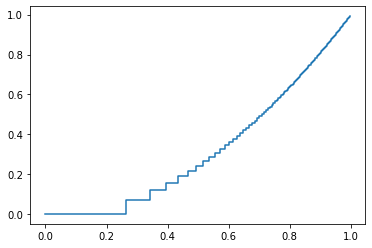

(0.9929656557355789, 0.9858392230049502, 0.0002484143440323109, 1899)


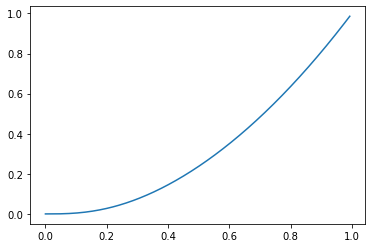

(0.9945409175790455, 0.9889320621095726, 0.00015125359524806604, 862)


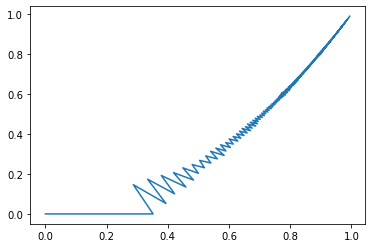

In [13]:
start_1, start_2 = 0, 0
for case in (1, 2, 3):
    counter = 0
    x_s = [start_1]
    y_s = [start_2]
    result = grad_2(func_2, func_2_grad, start_1, start_2, x_s, y_s, case, counter)
    print(result)
    plt.plot(x_s, y_s)
    plt.show()